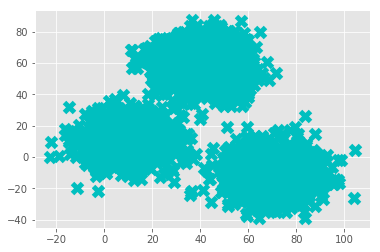

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pandas as pd


X = pd.read_csv('https://gist.githubusercontent.com/prmishra/0e42b7444729751f354f668687ae0f4c/raw/072e4757d4041f789f00b0943b6ffed607342f16/data.csv')
X = np.array(X)

plt.scatter(X[:,0],X[:,1],s=100,marker="x",color=color,linewidth=5)

In [0]:
colors = 10*['g','r','c','b','k']

class k_means:
  def __init__(self,k=3,tol=0.001,max_iter=300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter
    
  def fit(self,data):
    self.centroids = {}
    for i in range(self.k):
      self.centroids[i]=data[i]
      
    for i in range(self.max_iter):
      self.classifications = {}
      
      for i in range(self.k):
        self.classifications[i]=[]
      
      for featureset in data:
        distances=[np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        self.classifications[classification].append(featureset)
      
      prev_centroid = dict(self.centroids)
    
      for classification in self.classifications:
        self.centroids[classification]=np.average(self.classifications[classification],axis=0)
      
      optimized = True
    
      for c in self.centroids:
        org_centroid = prev_centroid[c]
        current_centroid = self.centroids[c]
        if(np.sum((current_centroid-org_centroid)/org_centroid*100)>self.tol):
          optimized = False
        
      if optimized:
        break
      
  
      
      
      
      
      
      
      
   

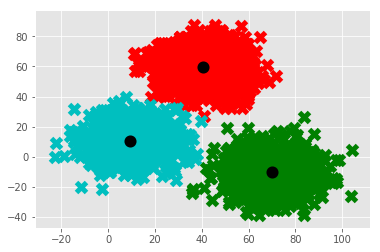

In [27]:
clf = k_means()
clf.fit(X)

  
for classification in clf.classifications:
  color = colors[classification]
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0],featureset[1],marker="x",color=color,s=100,linewidth=5)
    

for centroid in clf.centroids:
  plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1],marker="o",color='k',s=50,linewidth=5)